In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):

    with open(filename) as training_file:
        csv_load = csv.reader(training_file, delimiter=',')
        temp_img = []
        temp_label =[]
        next(csv_load)
        for row in csv_load:
            temp_label.append(row[0])
            img = row[1:785]
            temp_img.append(np.array_split(img,28))
        images = np.array(temp_img).astype('float')
        labels = np.array(temp_label).astype('float')
            
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0, rotation_range = 40,
    height_shift_range = 0.2, width_shift_range = 0.2,
    shear_range = 0.2, zoom_range = 0.2,
    horizontal_flip=True, fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale = 1. / 255.)
    
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=26, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit_generator(train_datagen.flow(training_images, training_labels,batch_size=32),
                              steps_per_epoch = len(training_images)/32,
                              epochs=2,
                              validation_data= validation_datagen.flow(testing_images, testing_labels,batch_size=32),
                              validation_steps=len(testing_images)/32)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/2
858/857 [==============================] - 53s 62ms/step - loss: 2.6483 - acc: 0.1884 - val_loss: 1.9825 - val_acc: 0.3505
Epoch 2/2
858/857 [==============================] - 51s 59ms/step - loss: 1.8149 - acc: 0.4196 - val_loss: 1.0804 - val_acc: 0.6159


[224.59327293519394, 0.3503904]

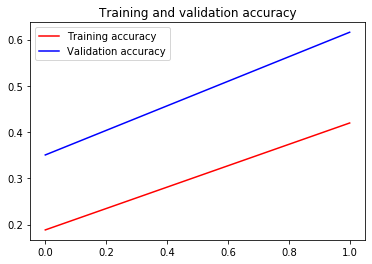

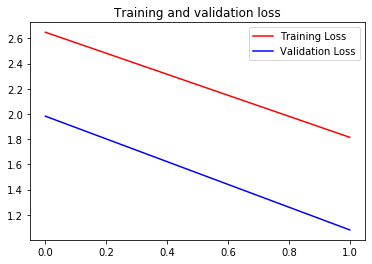

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()